# Estrutura e preparação de dados tridimensionais

In [2]:
# importa os pacotes necessários
import pandas as pd
# Lê o arquivo na pasta de dados usando as duas primeiras linhas como cabeçalho
dados = pd.read_csv('./dados/corrida.txt',header=[0,1])
# mostra as primeiras 5 linhas da tabela
dados.head()

frame           C7                                   T10              \
  frame            X           Y            Z            X           Y   
0     0  1517.891846  433.902649  1671.428589  1535.836426  523.817200   
1     1  1517.770386  433.925690  1671.695557  1535.661865  523.604065   
2     2  1517.627319  433.969513  1671.926147  1535.455933  523.383667   
3     3  1517.463135  434.038635  1672.095703  1535.218506  523.164917   
4     4  1517.278564  434.136932  1672.178345  1534.949951  522.957397   

                       CLAV                           ...        RHEE  \
             Z            X           Y            Z  ...           Z   
0  1520.421143  1498.923096  312.356506  1568.794678  ...  241.671051   
1  1520.476562  1498.479858  312.336212  1569.227295  ...  240.691132   
2  1520.455933  1497.980103  312.322662  1569.635742  ...  239.608963   
3  1520.334595  1497.431641  312.318329  1569.989502  ...  238.444656   
4  1520.087646  1496.843506  312.324799  1570.257324  ...  237.220322   

          RTOE                              L_Tibia                          \
             X           Y           Z            X           Y           Z   
0  1466.538452  142.773422  311.309174  1618.363159  595.904663  607.636841   
1  1466.733521  138.509857  313.366211  1618.030640  597.238770  608.128052   
2  1466.938232  134.005173  315.454987  1617.646240  598.634583  608.561646   
3  1467.146240  129.414490  317.472900  1617.213501  600.040039  608.895386   
4  1467.352783  124.909683  319.306183  1616.738281  601.398315  609.085754   

       R_Tibia                          
             X           Y           Z  
0  1423.248657  265.959808  637.632019  
1  1423.109131  265.835480  637.695496  
2  1422.955811  265.663635  637.688538  
3  1422.791992  265.437256  637.586426  
4  1422.620972  265.150665  637.363037  

[5 rows x 70 columns]

In [3]:
# seleciona todas as linhas e as colunas a partir da segunda(indice 1), e extrai apenas os valores
matriz = dados.iloc[:,1:].values
# converte para o arranjo de formato desejado
arranjo = matriz.reshape(matriz.shape[0], int(matriz.shape[1]/3),3)
# faz eco da variável arranjo para exibi-la
arranjo

array([[[1517.891846,  433.902649, 1671.428589],
        [1535.836426,  523.8172  , 1520.421143],
        [1498.923096,  312.356506, 1568.794678],
        ...,
        [1466.538452,  142.773422,  311.309174],
        [1618.363159,  595.904663,  607.636841],
        [1423.248657,  265.959808,  637.632019]],

       [[1517.770386,  433.92569 , 1671.695557],
        [1535.661865,  523.604065, 1520.476562],
        [1498.479858,  312.336212, 1569.227295],
        ...,
        [1466.733521,  138.509857,  313.366211],
        [1618.03064 ,  597.23877 ,  608.128052],
        [1423.109131,  265.83548 ,  637.695496]],

       [[1517.627319,  433.969513, 1671.926147],
        [1535.455933,  523.383667, 1520.455933],
        [1497.980103,  312.322662, 1569.635742],
        ...,
        [1466.938232,  134.005173,  315.454987],
        [1617.64624 ,  598.634583,  608.561646],
        [1422.955811,  265.663635,  637.688538]],

       ...,

       [[1528.127319,  484.32019 , 1646.664185],
        [15

Text(0, 0.5, 'Z (mm)')

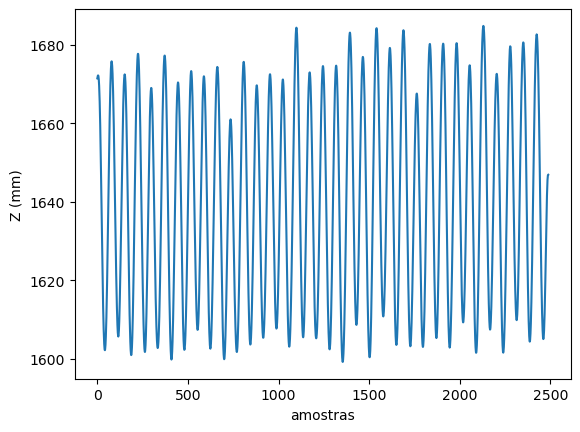

In [4]:
# importa a biblioteca para graficos
import matplotlib.pyplot as plt
# plota a altura do marcador em C7
plt.plot(arranjo[:,0,2])
plt.xlabel('amostras')
plt.ylabel('Z (mm)')

# visualização de dados tridimensionais

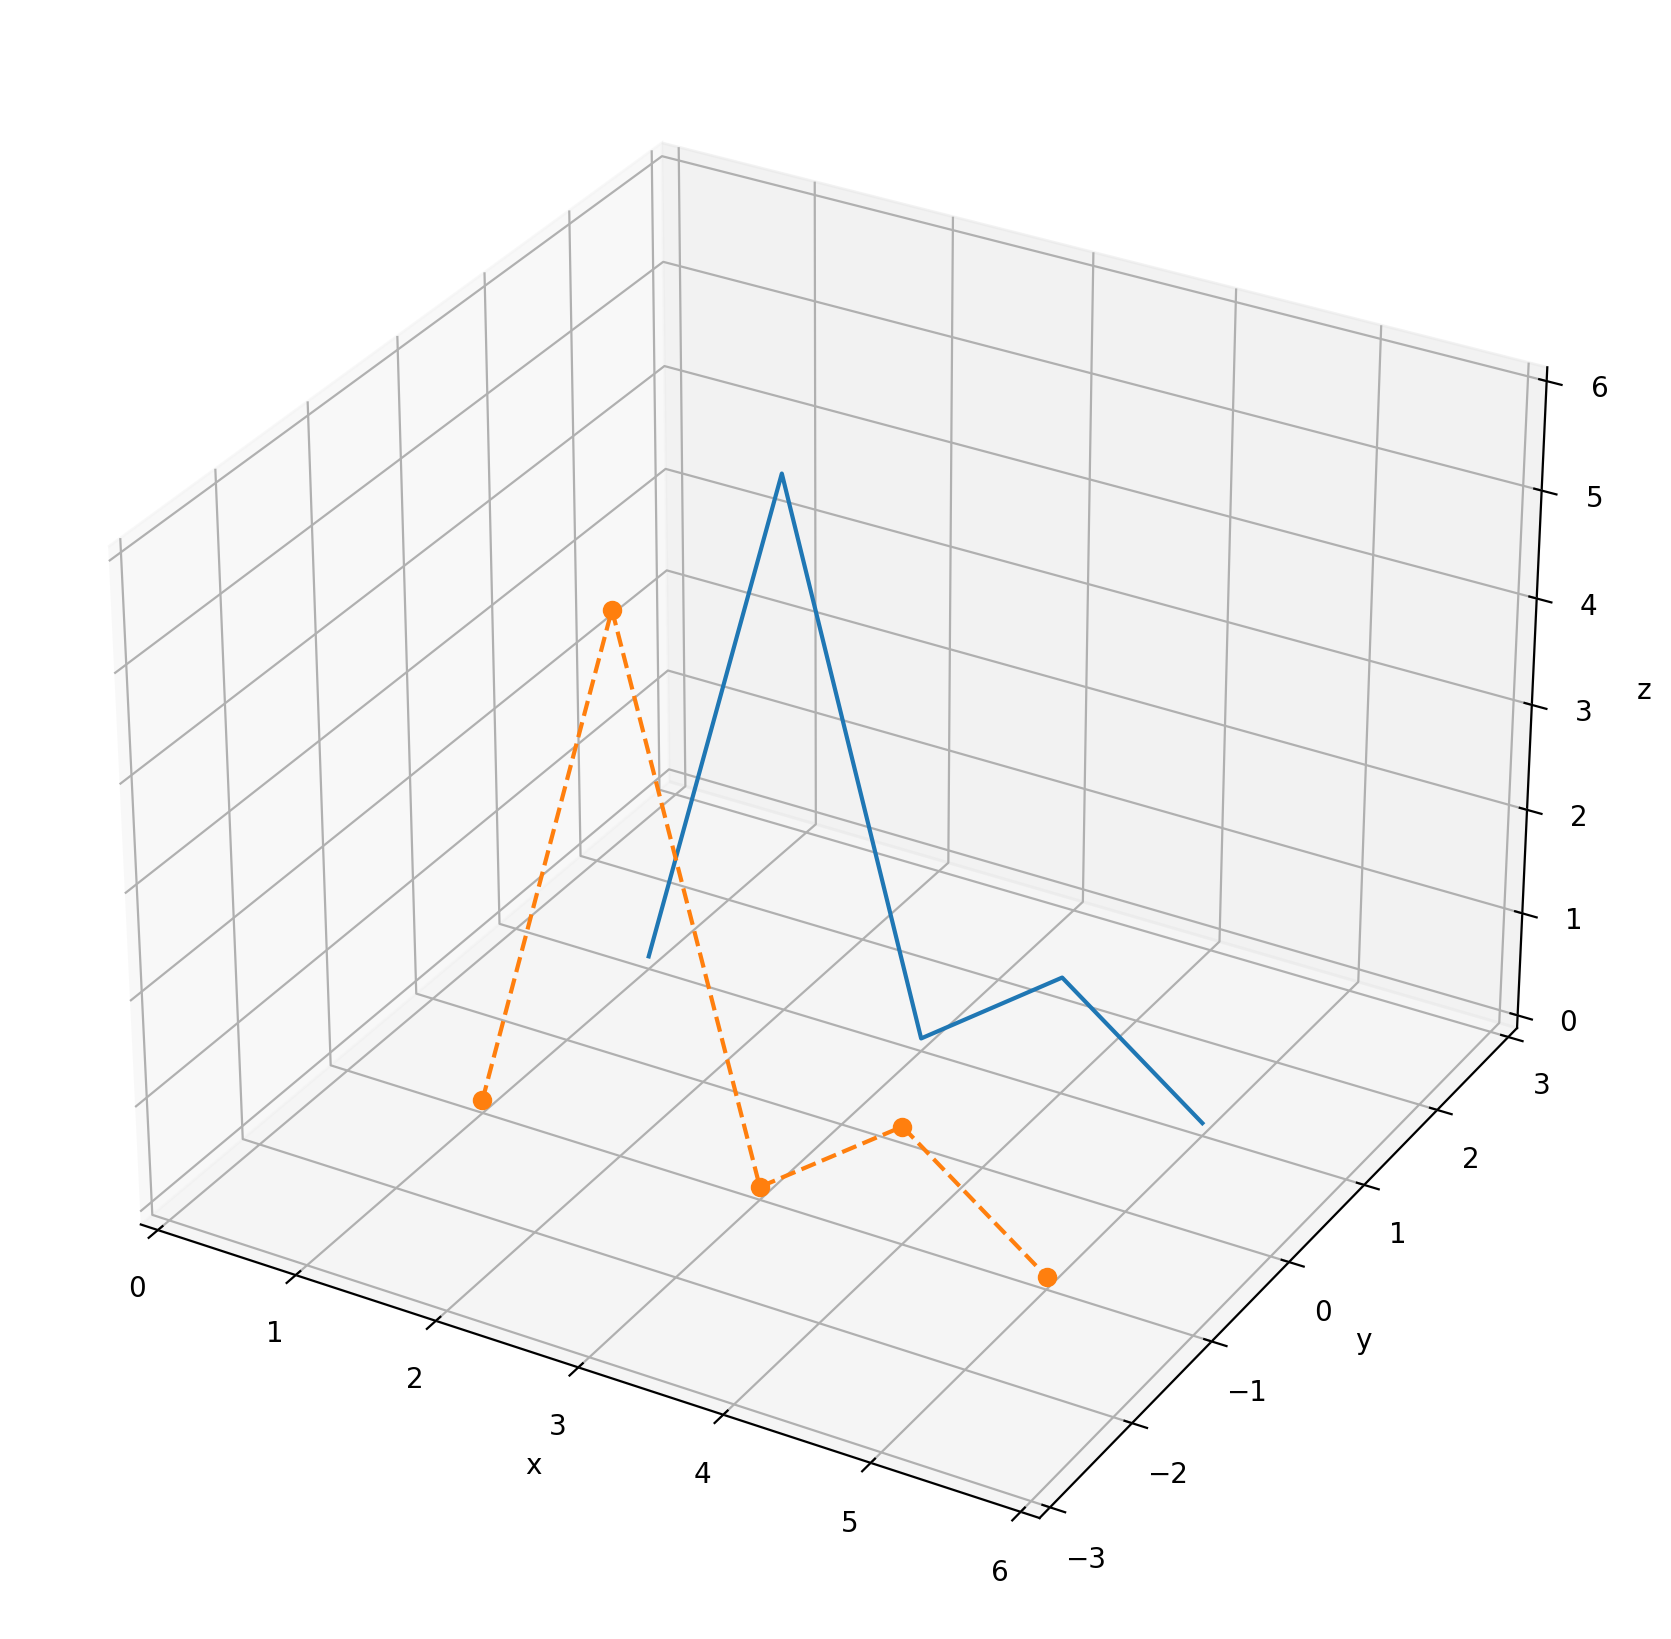

In [5]:
# impora o subpacotes do matplotlib contendo as ferramentas de visualização tridimensional
import mpl_toolkits.mplot3d as a3
# cria uma figura padrão, com tamanho e resolução ajustaveis
fig = plt.figure(figsize=(8,8),dpi=200)
# insere uma area de plotagem 3D que começa no canto esquerdo inferior e ocupa toda a area da figura (parametro rect)
ax = a3.Axes3D(fig,rect=[0,0,1,1],auto_add_to_figure=False)
# insere essa area na figura
fig.add_axes(ax)
# O método plot3d da area de plotagem inclui elementos de acordo com as coordenadas x,y,z informadas nos parametros xs, ys e zs
ax.plot3D(xs=[1,2,3,4,5],ys=[1,1,1,1,1],zs=[0,5,0,1,0])
# o método permite manipular facilmente a estética da linha que une os pontos e seus marcadores
ax.plot3D(xs=[1,2,3,4,5],ys=[-1,-1,-1,-1,-1],zs=[0,5,0,1,0],marker='o',linestyle='--')
# boa parte dos métodos de areas de plotagem 2D tambem estão implementados em 3D
ax.set_xlim(0,6) # como definir os limites da area de plotagem em cada eixo
ax.set_ylim(-3,3) 
ax.set_zlim(0,6) # e nesses casos, uma opção analoga para o eixo z geralmente esta disponivel
# para identificar o eixo temos disponivel método analogo ao presente em 2D
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

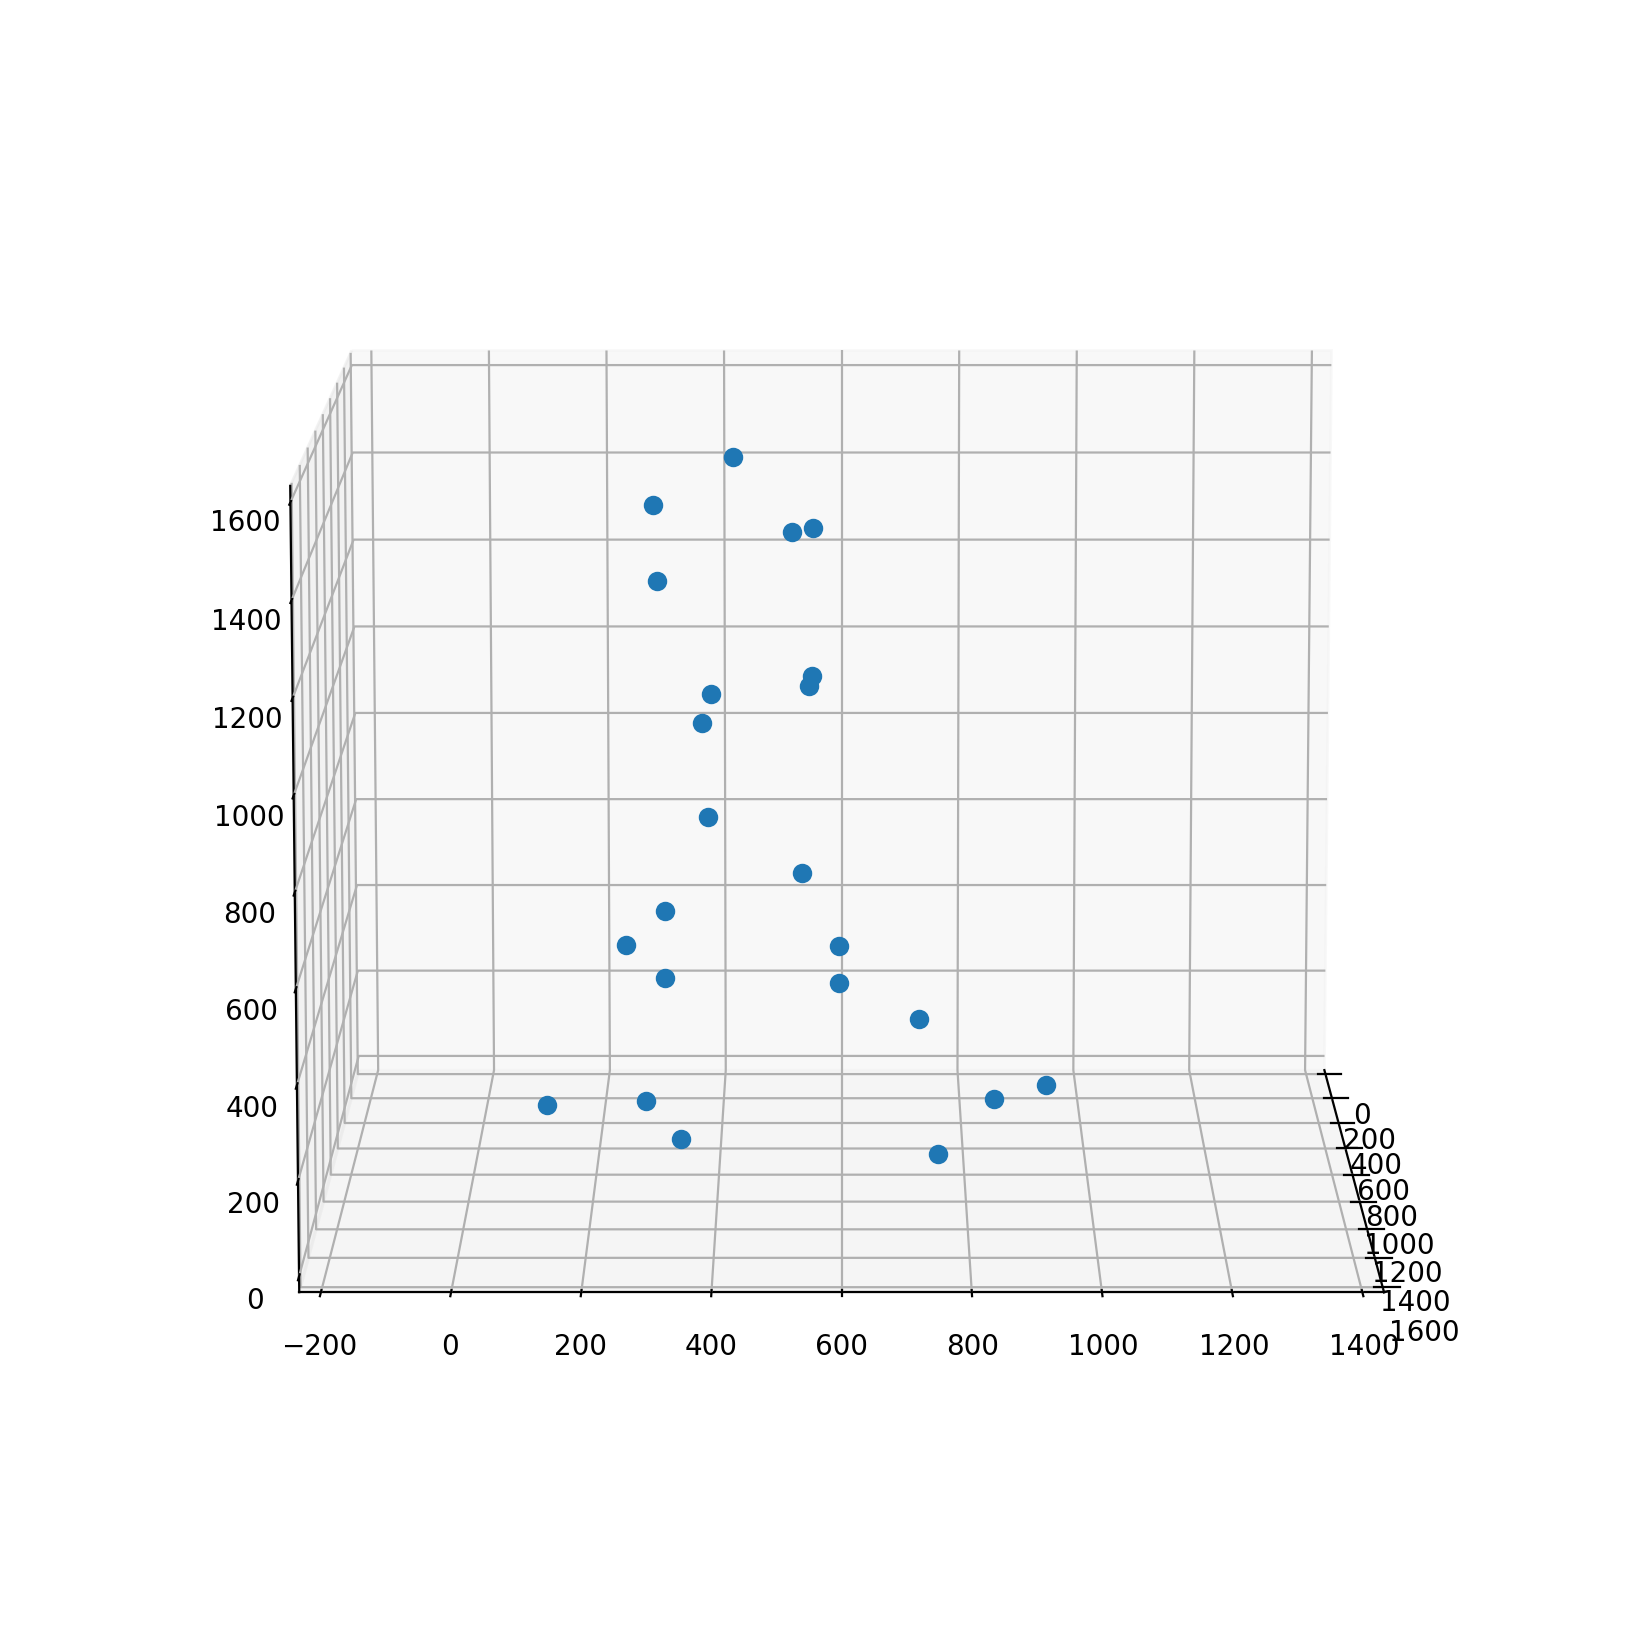

In [6]:
# renomeia o arranjo para explicitar os dados que ele armazena
coordenadas = arranjo 
# cria uma figura e area de visualização como no exemplo anterior
fig = plt.figure(figsize=(8,8),dpi=200)
ax = a3.Axes3D(fig,rect=[0,0,1,1],auto_add_to_figure=False,azim=0,elev=10) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# separa as coordenadas da primeira observação obtida na captura de movimento[
amostra1 = coordenadas[0]
# plota as coordenadas do eixo x, y e z de todos os marcadores (sabendo que os eixos estão armazenados nessa ordem)
# e salva esse elemento em uma váriavel para altera-los como necessário.
# como o plot3D retorna uma lista elementos e plotamos apenas um, recuperaremos esse primero e unic elemento 
lista_plots = ax.plot3D(amostra1[:,0], amostra1[:,1], amostra1[:,2])
plot_amostra1 = lista_plots[0]
# podemos então remover a linha que liga os pontos, para facilitar a visualização.
# para isso definimos sua espessura como nula (lw equivale a line width) 
plot_amostra1.set_lw(0)
# e incluir um marcador('O') na coordenada de cada marcador fisico registrado 
plot_amostra1.set_marker('o')
# definimos então os lacances do eixo para não distorcer a imagem
ax.set_xlim(0, 0 + 1600)
ax.set_ylim(-200, -200 + 1600)
ax.set_zlim(0, 0 + 1600);

(0.0, 1600.0)

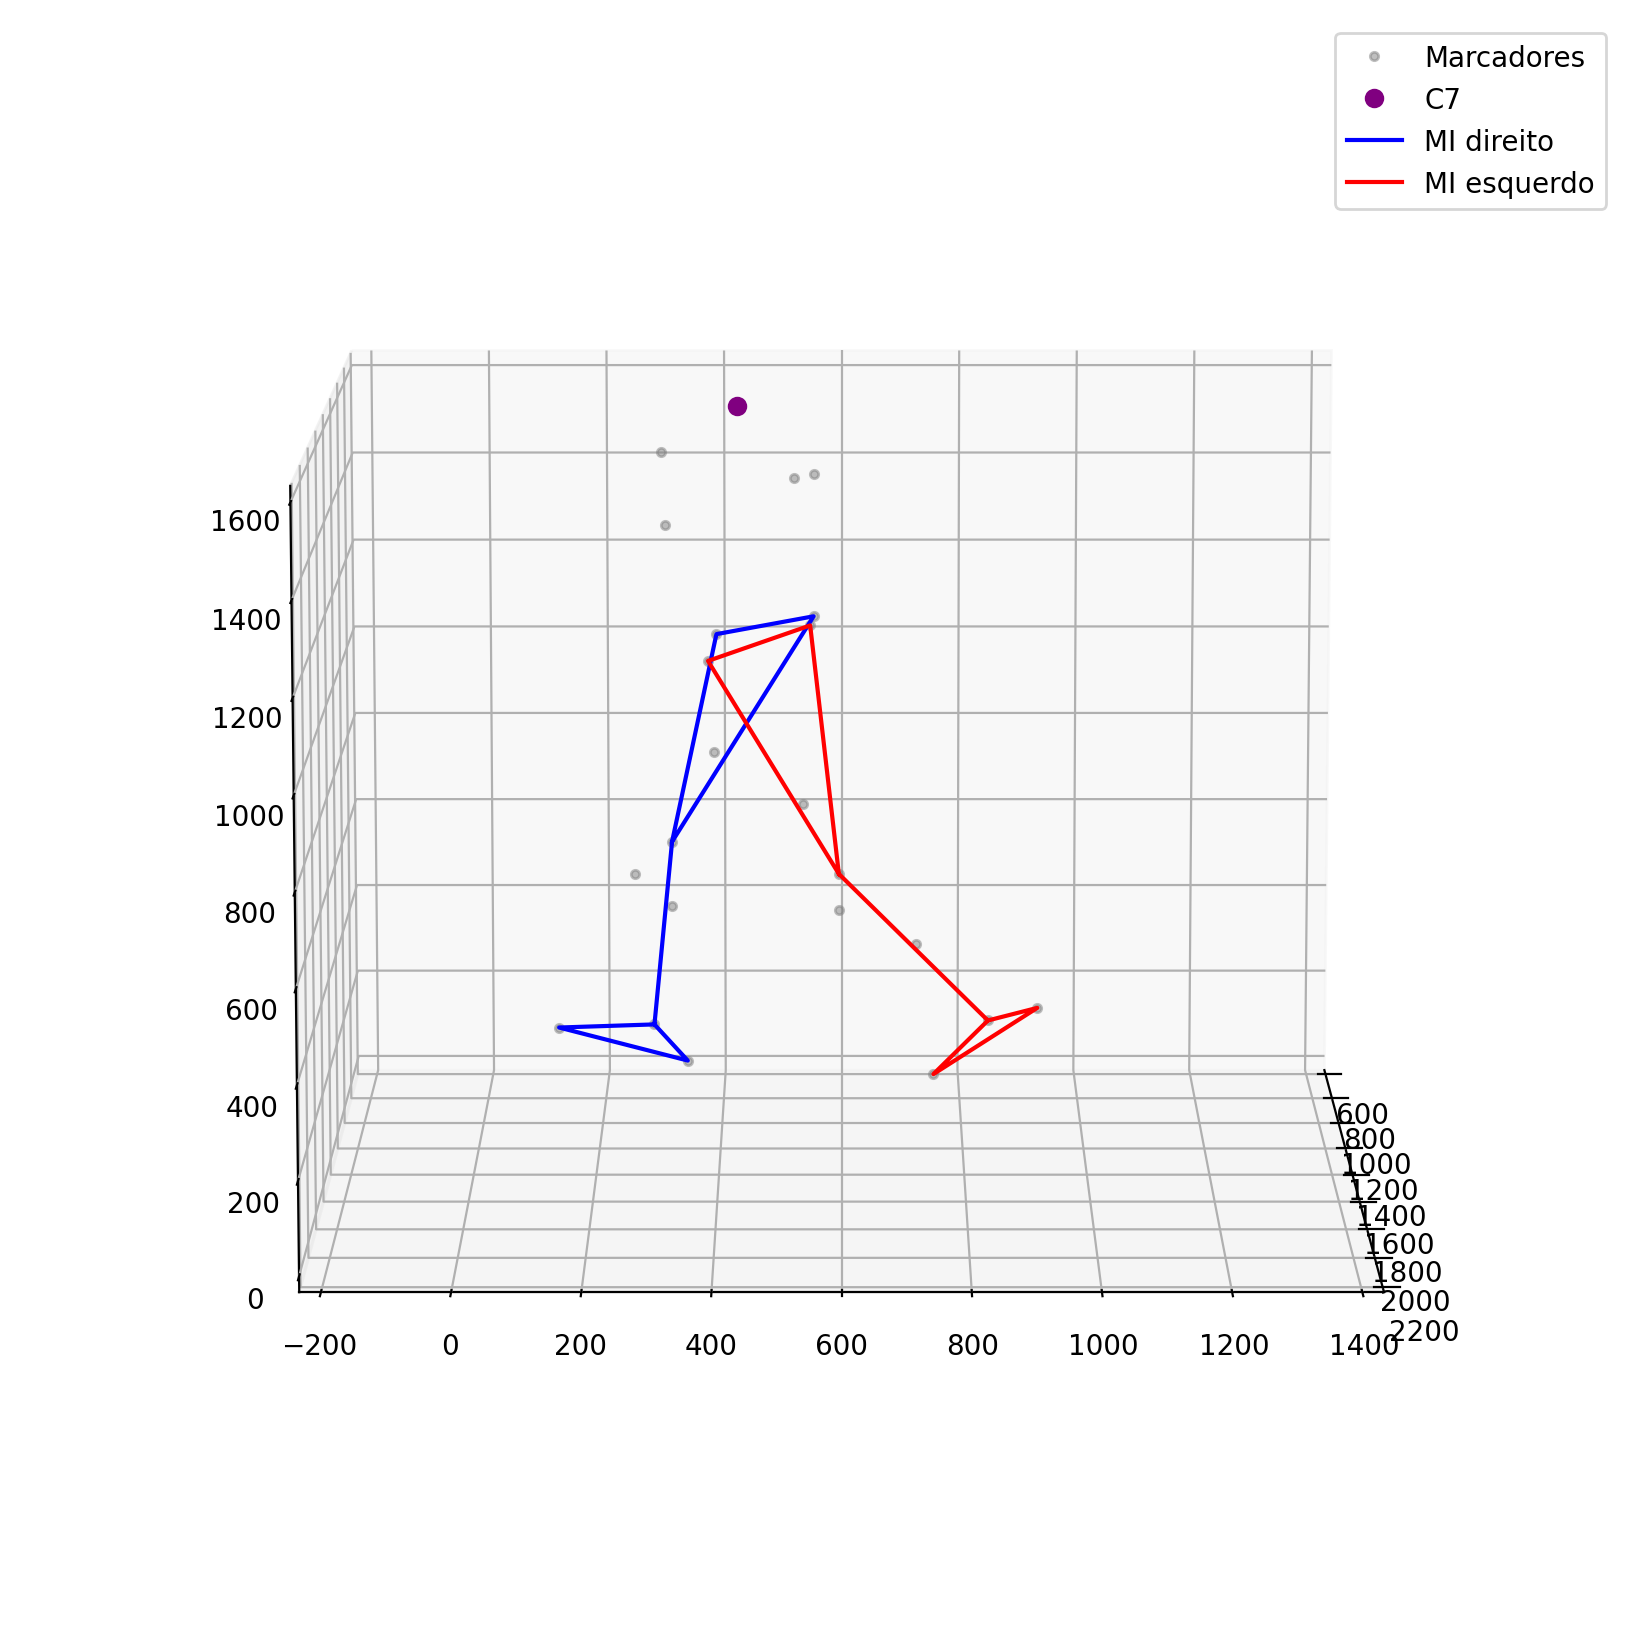

In [7]:
# renomeia o arranjo para explicitar os dados que ele armazena
coordenadas = arranjo 
# cria uma figura e area de visualização como no exemplo anterior
fig = plt.figure(figsize=(8,8),dpi=200)
ax = a3.Axes3D(fig,rect=[0,0,1,1],auto_add_to_figure=False,azim=0,elev=10) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# separa as coordenadas da primeira observação obtida na captura de movimento[
amostra = coordenadas[0]
# transpoe o arranjo com as coordenadas a serem plotadas antes de extrair, para que os elementos extraidos sejam xs, ys e zs 
plot_amostra1 = ax.plot3D(*amostra.T, lw=0, marker='.', color = 'grey', alpha = 0.5 , label = 'Marcadores')[0]
# plota os membros para mias facil identificação
C7 = ax.plot3D(*amostra[0].T, lw=0, color='purple', marker = 'o', label = 'C7')
MI_direito = ax.plot3D(*amostra[[16,6,8,16,18,19,20,18]].T, color='blue', label = 'MI direito')
MI_esquerdo = ax.plot3D(*amostra[[10,5,7,10,12,13,14,12]].T, color='red', label = 'MI esquerdo')
# insere legenda
ax.legend()
# definimos então os lacances do eixo para não distorcer a imagem
ax.set_xlim(600, 600 + 1600)
ax.set_ylim(-200, -200 + 1600)
ax.set_zlim(0, 0 + 1600)

In [9]:
# seleciona os nomes do primeiro nível da coluna e remove os valores repetidos
nome_colunas = dados.columns.get_level_values(0).unique()
# imprimi em tela o índice de cada um deles
for i,marcador in enumerate(nome_colunas):
    print(marcador, ':', i)

frame : 0
C7 : 1
T10 : 2
CLAV : 3
STRN : 4
RBAK : 5
LASI : 6
RASI : 7
LPSI : 8
RPSI : 9
LTHI : 10
LKNE : 11
LTIB : 12
LANK : 13
LHEE : 14
LTOE : 15
RTHI : 16
RKNE : 17
RTIB : 18
RANK : 19
RHEE : 20
RTOE : 21
L_Tibia : 22
R_Tibia : 23


In [8]:
# repetimos o codigo anterior, mudando o motor gráfico
%matplotlib qt
# renomeia o arranjo para explicitar os dados que ele armazena
coordenadas = arranjo 
# cria uma figura e area de visualização como no exemplo anterior
fig = plt.figure(figsize=(8,8),dpi=200)
ax = a3.Axes3D(fig,rect=[0,0,1,1],auto_add_to_figure=False,azim=0,elev=10) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# separa as coordenadas da primeira observação obtida na captura de movimento[
amostra = coordenadas[0]
# transpoe o arranjo com as coordenadas a serem plotadas antes de extrair, para que os elementos extraidos sejam xs, ys e zs 
plot_amostra1 = ax.plot3D(*amostra.T, lw=0, marker='.', color = 'grey', alpha = 0.5 , label = 'Marcadores')[0]
# plota os membros para mias facil identificação
C7 = ax.plot3D(*amostra[0].T, lw=0, color='purple', marker = 'o', label = 'C7')
MI_direito = ax.plot3D(*amostra[[16,6,8,16,18,19,20,18]].T, color='blue', label = 'MI direito')
MI_esquerdo = ax.plot3D(*amostra[[10,5,7,10,12,13,14,12]].T, color='red', label = 'MI esquerdo')
# insere legenda
ax.legend()
# definimos então os lacances do eixo para não distorcer a imagem
ax.set_xlim(600, 600 + 1600)
ax.set_ylim(-200, -200 + 1600)
ax.set_zlim(0, 0 + 1600);

In [10]:
# A alteração do motor gráfico sera mantida, de forma que não é necessario altera-lo novamente
# o motor grafico padrão é o inline, para volotar ao utilizado remova o marcador de comentário da linha abaixo
# %matplotlib inline
# importa o pacote do matplotlib com as funções relacionadas a animação
import matplotlib.animation as animation
# cria uma figura e area de visualização de base para a animação
fig = plt.figure(figsize=(8,8),dpi=100)
ax = a3.Axes3D(fig,rect=[0,0,1,1],auto_add_to_figure=False,azim=0,elev=10) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# transpoe o arranjo com as coordenadas a serem plotadas antes de extrair, para que os elementos extraidos sejam xs, ys e zs 
marcadores = ax.plot3D(*coordenadas[0].T, lw=0, marker='.', color = 'grey', alpha = 0.5,label = 'Marcadores', animated=True)[0]
C7 = ax.plot3D(*coordenadas[0,0].T, lw=0, color='purple', marker = 'o', label = 'C7',animated=True)[0]
MI_direito = ax.plot3D(*coordenadas[0,[16,6,8,16,18,19,20,18]].T, color='blue', label = 'MI direito',animated=True)[0]
MI_esquerdo = ax.plot3D(*coordenadas[0,[10,5,7,10,12,13,14,12]].T, color='red', label = 'MI esquerdo',animated=True)[0]
# insere legenda
ax.legend()
# definimos então os lacances do eixo para não distorcer a imagem
ax.set_xlim(600, 600 + 1600)
ax.set_ylim(-200, -200 + 1600)
ax.set_zlim(0, 0 + 1600)
# apos construida a figura de base, cria a função responsavel por manipular os elementos da animação
# essa função pode ter qualquer nome, e é comum chamada de animate
def animate(quadro):
    marcadores.set_data_3d(*coordenadas[quadro].T)
    C7.set_data_3d(*coordenadas[quadro,0].T)
    MI_direito.set_data_3d(*coordenadas[quadro,[16,6,8,16,18,19,20,18]].T)
    MI_esquerdo.set_data_3d(*coordenadas[quadro,[10,5,7,10,12,13,14,12]].T)
    return [marcadores,C7,MI_direito,MI_esquerdo]
# # aplica a função responsavel por alterar os elementos da figura em cada intervalo
animacao = animation.FuncAnimation(fig,animate,frames=len(coordenadas),
                                   repeat=True,interval=1/100,blit=True)

# Análise das distancias euclideanas

In [15]:
# importa os dados de salto
dados = pd.read_csv('./dados/salto.csv',header=[0,1])
# seleciona as coordenadas e converte para o arranjo adequado
coordenadas = dados.values
coordenadas = coordenadas.reshape(coordenadas.shape[0],int(coordenadas.shape[1]/3),3)
# mostra a estrutura da tabela dados
dados.head()

CentreOfMass                          LFHD                           \
        X (mm)   Y (mm)   Z (mm)      X (mm)      Y (mm)       Z (mm)   
0     -200.135  500.663  1057.38 -254.275864  467.833832  1687.038330   
1     -200.066  500.638  1057.40 -254.170868  467.928650  1687.060547   
2     -200.001  500.615  1057.41 -254.068695  468.018036  1687.081299   
3     -199.941  500.591  1057.43 -253.971970  468.102661  1687.100586   
4     -199.884  500.569  1057.45 -253.883041  468.183105  1687.118286   

         RFHD                                LBHD  ...        RTIB  \
       X (mm)      Y (mm)       Z (mm)     X (mm)  ...      Z (mm)   
0 -225.111649  579.643555  1695.306519 -90.018761  ...  404.048004   
1 -225.037430  579.760559  1695.270020 -89.848991  ...  404.050873   
2 -224.971359  579.871643  1695.232056 -89.657959  ...  404.055603   
3 -224.913284  579.976562  1695.193359 -89.453148  ...  404.061340   
4 -224.863037  580.074768  1695.155151 -89.244484  ...  404.067566   

         RANK                                RHEE                         \
       X (mm)      Y (mm)      Z (mm)      X (mm)      Y (mm)     Z (mm)   
0 -306.526642  727.341309  111.892059 -368.275970  672.230835  69.262352   
1 -306.520966  727.336487  111.903336 -368.270020  672.226746  69.273201   
2 -306.514984  727.331177  111.912094 -368.263977  672.222778  69.281898   
3 -306.507660  727.325317  111.918098 -368.257843  672.219482  69.288681   
4 -306.498718  727.318848  111.921394 -368.251526  672.216858  69.293617   

         RTOE                         
       X (mm)      Y (mm)     Z (mm)  
0 -143.263489  731.555603  59.915363  
1 -143.251480  731.555786  59.915012  
2 -143.241165  731.556885  59.914856  
3 -143.233444  731.558960  59.914986  
4 -143.228699  731.561768  59.915451  

[5 rows x 120 columns]

In [17]:
%matplotlib qt
# cria uma figura e area de visualização de base para a animação
fig = plt.figure(figsize=(8,8),dpi=100)
ax = a3.Axes3D(fig,rect=[0, 0.2, 1, 0.8],auto_add_to_figure=False,azim=30,elev=10) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# adiciona uma area de visualização adicional
ax_auxiliar = plt.Axes(fig,rect=[0.1, 0.1, .8, 0.1])
fig.add_axes(ax_auxiliar)
# transpoe o arranjo com as coordenadas a serem plotadas antes de extrair, para que os elementos extraidos sejam xs, ys e zs 
marcadores = ax.plot3D(*coordenadas[0].T, lw=0, marker='.', color = 'grey', alpha = 0.5,label = 'Marcadores', animated=True)[0]
CdM = ax.plot3D(*coordenadas[0,0].T, lw=0, marker='.', color = 'purple', alpha = 0.5,label = 'CdM', animated=True)[0]
# insere legenda
ax.legend()
# definimos então os lacances do eixo para não distorcer a imagem
ax.set_xlim(-1500, 500)
ax.set_ylim(-500, 1500)
ax.set_zlim(0, 2000)
# separa a altura do centro de massa para plotar no eixo auxiliar
altura_CdM = coordenadas[:,0,2]
# constroi o grafico
ax_auxiliar.plot(altura_CdM)
# insere uma linha vertival para indicar o tempo
linha_progressao = ax_auxiliar.axvline(color='k',animated=True)
# função de animação
def animate(quadro):
    marcadores.set_data_3d(*coordenadas[quadro].T)
    CdM.set_data_3d(*coordenadas[quadro,0].T)
    # atualiza a posição da linha de progressão
    linha_progressao.set_data([quadro,quadro],[0,1])
    return [marcadores,CdM,linha_progressao]
# # aplica a função responsavel por alterar os elementos da figura em cada intervalo
animacao = animation.FuncAnimation(fig,animate,frames=len(coordenadas),
                                   repeat=True,interval=1/100,blit=True)


In [28]:
# seleciona os nomes do primeiro nivel da coluna e remove os valores repetidos
nome_colunas = dados.columns.get_level_values(0).unique()
# imprimi em tela o indice de cada um deles
for i,marcador in enumerate(nome_colunas):
    print(marcador, ':', i)

CentreOfMass : 0
LFHD : 1
RFHD : 2
LBHD : 3
RBHD : 4
C7 : 5
T10 : 6
CLAV : 7
STRN : 8
RBAK : 9
LSHO : 10
LUPA : 11
LELB : 12
LFRM : 13
LWRA : 14
LWRB : 15
LFIN : 16
RSHO : 17
RUPA : 18
RELB : 19
RFRM : 20
RWRA : 21
RWRB : 22
RFIN : 23
LASI : 24
RASI : 25
LPSI : 26
RPSI : 27
LTHI : 28
LKNE : 29
LTIB : 30
LANK : 31
LHEE : 32
LTOE : 33
RTHI : 34
RKNE : 35
RTIB : 36
RANK : 37
RHEE : 38
RTOE : 39


Text(0, 0.5, 'Velocidade (m/s)')

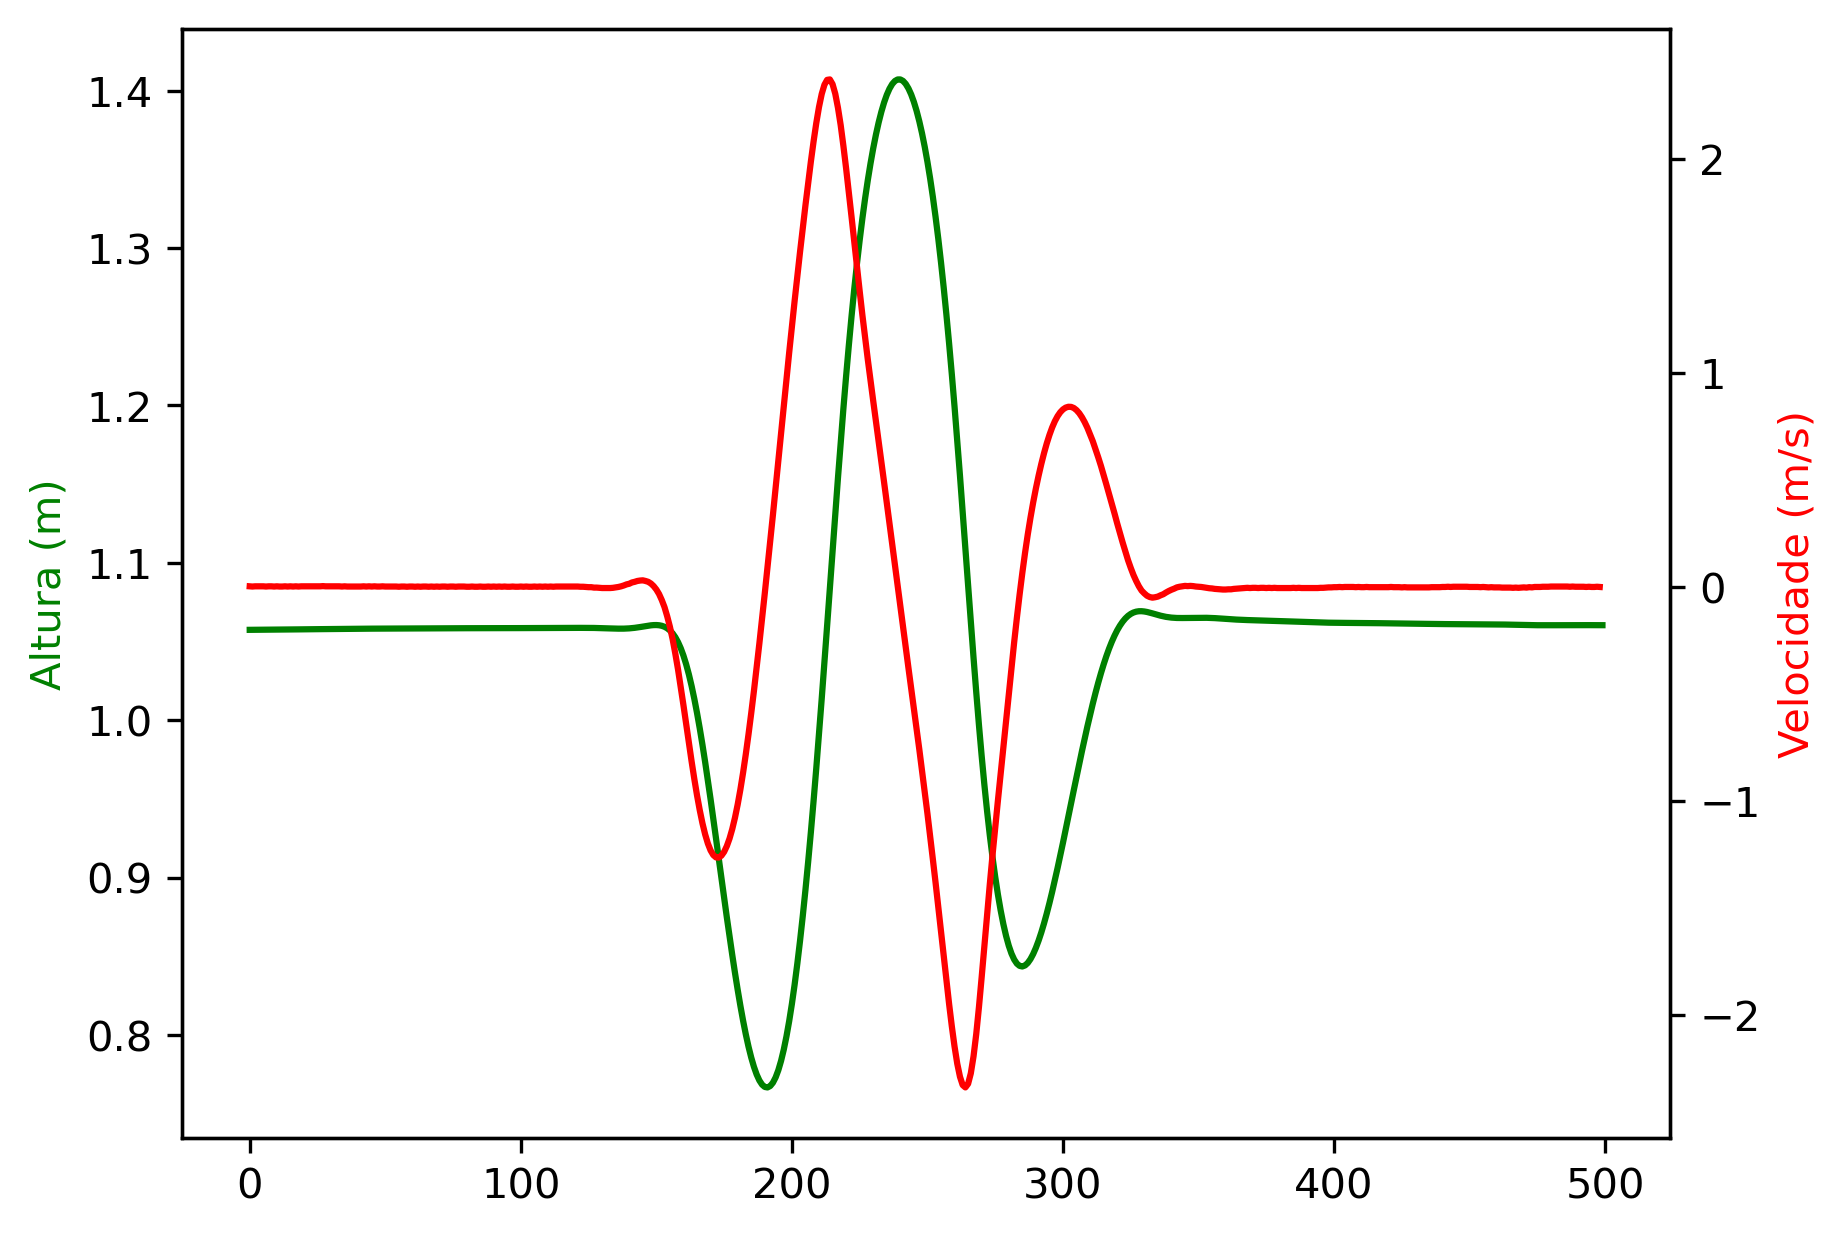

In [29]:
# vamos voltar a plotar nossas imagens de maneira não interativa
%matplotlib inline
# importa pacote para lidar com calculoso numéricos em vetores
import numpy as np
# obtem a altura do centro de massa e converte de mm para m
altura_CdM = coordenadas[:,0,2]/1000
velocidade_CdM = np.diff(altura_CdM)/(1/100)
# Mostra os dados
plt.figure(dpi=300)
plt.plot(altura_CdM,color='green')
plt.ylabel('Altura (m)',color='green')
plt.twinx()
plt.plot(velocidade_CdM,color='red')
plt.ylabel('Velocidade (m/s)',color='red')

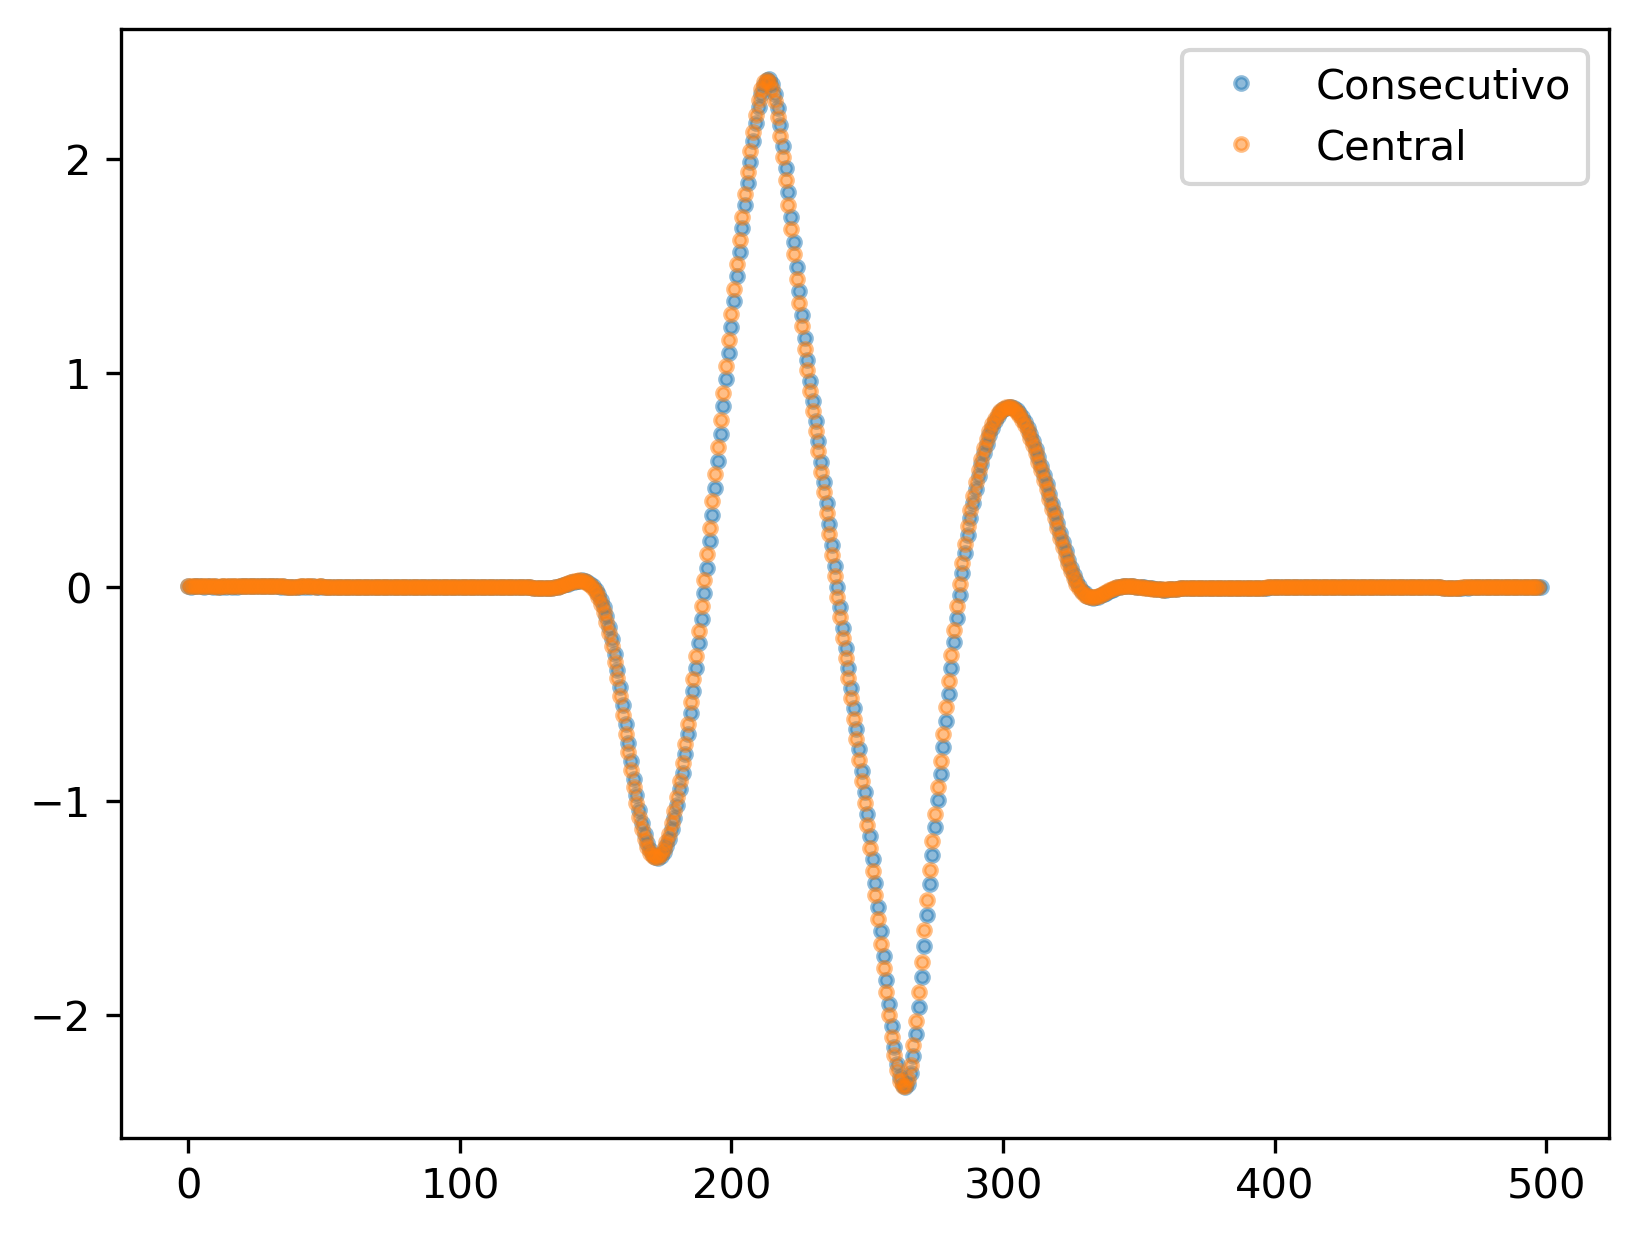

In [30]:
# Passa pelos indices dos valores em altura_CdM, com exceção dos dois ultimos para calcular a velocidade central
velocidade_CdM_central = []
for i in range(len(altura_CdM)-2):
    velocidade_CdM_central.append((altura_CdM[i+2]-altura_CdM[i]) / ((1/100)*2))
# plota a velocidade obtida em ambos os métodos
plt.figure(dpi=300)
plt.plot(velocidade_CdM,'.',alpha=0.5,label='Consecutivo')
plt.plot(velocidade_CdM_central,'.',alpha=0.5,label='Central')
plt.legend()

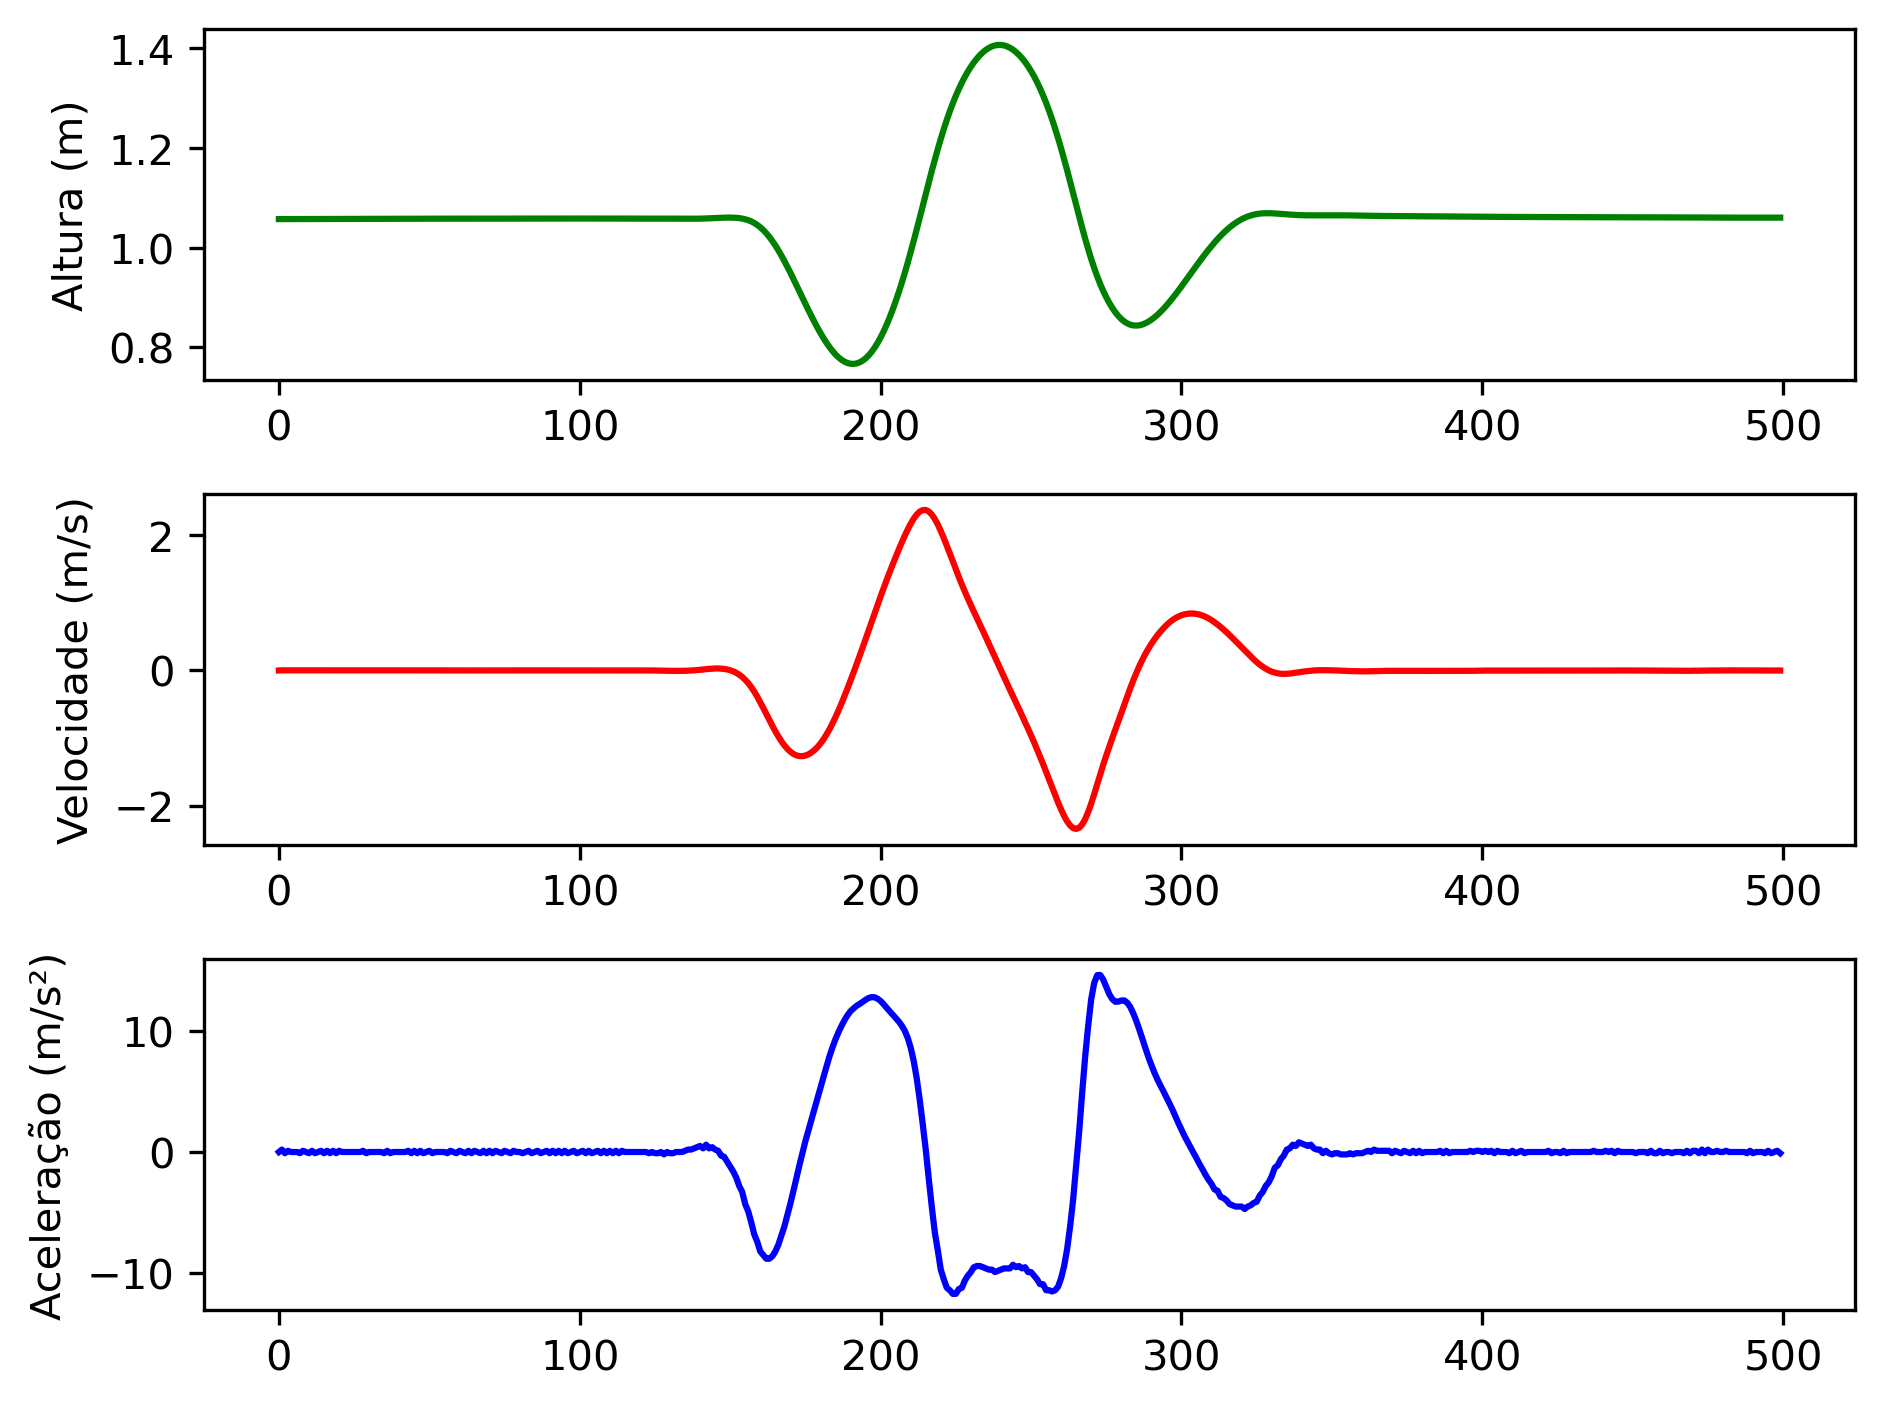

In [31]:
# inclui pacote para analise de sinais
import scipy.signal as sig
# incluimos um valor no inicio do arranjo de velocidades
velocidade_CdM = np.concatenate([[0],velocidade_CdM])
# calculo da aceleração vertical bruta
aceleracao_CdM = np.diff(velocidade_CdM)/(1/100)
# novamente inclui um valor no inico do arranjo
aceleracao_CdM = np.concatenate([[0],aceleracao_CdM])
# Mostra os dados
plt.figure(dpi=300)
plt.subplot(311)
plt.plot(altura_CdM,color='green')
plt.ylabel('Altura (m)')
plt.subplot(312)
plt.plot(velocidade_CdM,color='red')
plt.ylabel('Velocidade (m/s)')
plt.subplot(313)
plt.plot(aceleracao_CdM,color='blue')
plt.ylabel('Aceleração (m/s²)')
plt.tight_layout()

In [32]:
# define os pontos correspondete aos joelhos
indice_joelho_direito = 29
indice_joelho_esquerdo = 35
# cria uma lista para receber os valores de distancia de cada amostra
distancia_joelhos = []
# passa por cada amostra
for amostra in coordenadas:
    # separa as coordenadas de cada ponto
    coordenada_joelho_direito = amostra[indice_joelho_direito]
    coordenada_joelho_esquerdo = amostra[indice_joelho_esquerdo]
    # calcula o vetor distancia entre os pontos
    vetor_distancia = coordenada_joelho_direito - coordenada_joelho_esquerdo
    # calcula o tamanho desse vetor
    distancia = np.linalg.norm(vetor_distancia)
    # inclui na lista respectiva
    distancia_joelhos.append(distancia) 
# define um motor grafico interativo
%matplotlib qt
# cria uma figura e area de visualização de base para a animação
fig = plt.figure(figsize=(8,8),dpi=100)
ax = a3.Axes3D(fig,rect=[0, 0.2, 1, 0.8],auto_add_to_figure=False,azim=30,elev=10) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# adiciona uma area de visualização adicional
ax_auxiliar = plt.Axes(fig,rect=[0.1, 0.1, .8, 0.1])
fig.add_axes(ax_auxiliar)
# transpoe o arranjo com as coordenadas a serem plotadas antes de extrair, para que os elementos extraidos sejam xs, ys e zs 
marcadores = ax.plot3D(*coordenadas[0].T, lw=0, marker='.', color = 'grey', alpha = 0.5,label = 'Marcadores', animated=True)[0]
joelhos = ax.plot3D(*coordenadas[0,[indice_joelho_direito,indice_joelho_esquerdo]].T, lw=1, marker='.', color = 'purple', alpha = 0.5,label = 'CdM', animated=True)[0]
# insere legenda
ax.legend()
# definimos então os lacances do eixo para não distorcer a imagem
ax.set_xlim(-1500, 500)
ax.set_ylim(-500, 1500)
ax.set_zlim(0, 2000)
# constroi o grafico
ax_auxiliar.plot(distancia_joelhos)
# insere uma linha vertival para indicar o tempo
linha_progressao = ax_auxiliar.axvline(color='k',animated=True)
# função de animação
def animate(quadro):
    marcadores.set_data_3d(*coordenadas[quadro].T)
    joelhos.set_data_3d(*coordenadas[quadro,[indice_joelho_direito,indice_joelho_esquerdo]].T)
    # atualiza a posição da linha de progressão
    linha_progressao.set_data([quadro,quadro],[0,1])
    return [marcadores,joelhos,linha_progressao]
# # aplica a função responsavel por alterar os elementos da figura em cada intervalo
animacao = animation.FuncAnimation(fig,animate,frames=len(coordenadas),
                                   repeat=True,interval=1/100,blit=True)


# Velocidade linear em relação ao sistema global de coordenadas {

In [64]:
# importa os dados da tarefa
dados = pd.read_csv('./dados/alcancar_e_mover.csv',header=[0])
# seleciona as coordenadas e converte para o arranjo adequado, assim como nos exemplso anteriores
coordenadas = dados.values
coordenadas = coordenadas.reshape(coordenadas.shape[0],int(coordenadas.shape[1]/3),3)
# converte as coordenadas de mm para metros
coordenadas = coordenadas / 1000
# mostra a estrutura da tabela dados
dados.head()

,Body center of mass-x,Body center of mass-y,Body center of mass-z,7th cervical vertebrae-x,7th cervical vertebrae-y,7th cervical vertebrae-z,10th thoracic vertebrae-x,10th thoracic vertebrae-y,10th thoracic vertebrae-z,Jugular notch-x,...,Ulnar styloid process LT-z,Hand tip LT-x,Hand tip LT-y,Hand tip LT-z,Hip LT-x,Hip LT-y,Hip LT-z,Hip RT-x,Hip RT-y,Hip RT-z
0,-11.619958,4.684102,958.844826,52.557178,-15.771629,1487.406488,90.556917,-30.685688,1209.122054,-38.341450,...,872.746172,-20.868776,-136.894790,709.313605,-46.765140,-76.148861,876.674012,9.926507,87.394851,875.897137
1,-11.622999,4.688393,958.846094,52.591765,-15.780376,1487.401485,90.567649,-30.692692,1209.114919,-38.310821,...,872.762771,-20.790042,-136.758987,709.338148,-46.778842,-76.143784,876.675601,9.918631,87.397906,875.898312
2,-11.626041,4.692685,958.847364,52.626352,-15.789125,1487.396481,90.578379,-30.699696,1209.107783,-38.280191,...,872.779391,-20.711334,-136.623216,709.362748,-46.792543,-76.138707,876.677191,9.910755,87.400962,875.899487
3,-11.629084,4.696976,958.848633,52.660937,-15.797875,1487.391473,90.589109,-30.706700,1209.100647,-38.249561,...,872.796033,-20.632654,-136.487479,709.387407,-46.806244,-76.133630,876.678782,9.902879,87.404018,875.900663
4,-11.633063,4.701834,958.850047,52.702206,-15.807212,1487.385820,90.602449,-30.714556,1209.092041,-38.212890,...,872.814329,-20.546866,-136.342674,709.414319,-46.822624,-76.127803,876.680803,9.892717,87.407685,875.902031


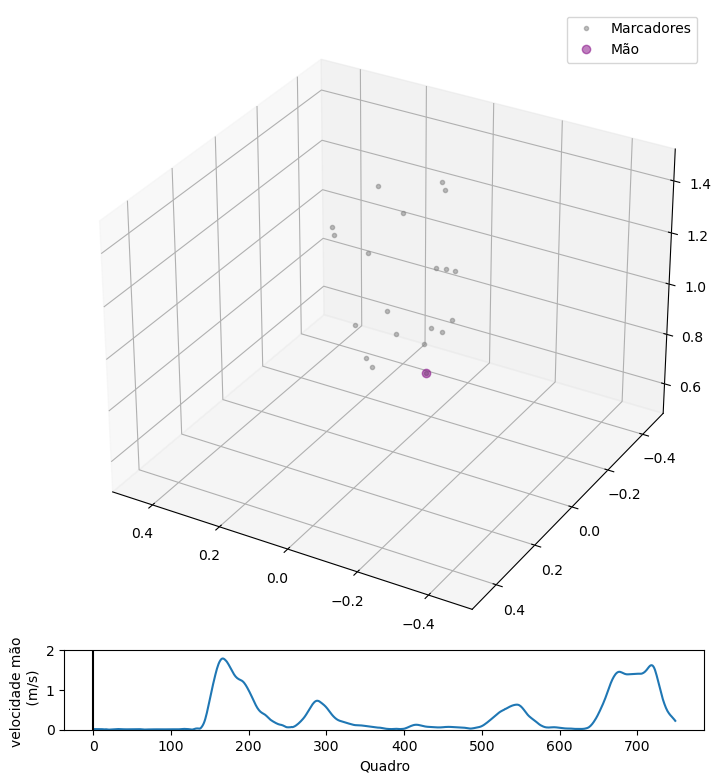

In [86]:
# define o ponto correspondente a mão
indice_mao = 17
# cria uma lista para receber os valores de deslocamento da mão entre as amostras
deslocamento_mao = []
# passa pelos indices correspondete as amostras (observações), exceto a ultima
for i in range(len(coordenadas)-1):
    # separa as coordenadas da amostra i e da seguinte
    coordenada_atual = coordenadas[i, indice_mao]
    coordenada_seguinte = coordenadas[i+1, indice_mao]
    # calcula o vetor deslocamento
    vetor_deslocamento = coordenada_seguinte - coordenada_atual
    # calcula o tamanho desse vetor
    deslocamento = np.linalg.norm(vetor_deslocamento)
    # inclui na lista respectiva
    deslocamento_mao.append(deslocamento)
#calcula a velocidade da mão
velocidade_mao = np.array(deslocamento_mao)/(1/100)
# inserte um valor nulo no inicio do vetor de veocidade
velocidade_mao = np.concatenate([[0],velocidade_mao])
# define um motor grafico interativo
%matplotlib inline
# cria uma figura e area de visualização de base para a animação
fig = plt.figure(figsize=(8,8),dpi=100)
ax = a3.Axes3D(fig,rect=[0, 0.2, 1, 0.8],auto_add_to_figure=False,azim=120,elev=30) # incluimos controle do azimute e elevação da camera
fig.add_axes(ax)
# adiciona uma area de visualização adicional
ax_auxiliar = plt.Axes(fig,rect=[0.1, 0.1, .8, 0.1])
fig.add_axes(ax_auxiliar)
# transpoe o arranjo com as coordenadas a serem plotadas antes de extrair, para que os elementos extraidos sejam xs, ys e zs 
marcadores = ax.plot3D(*coordenadas[0].T, lw=0, marker='.', color = 'grey', alpha = 0.5,label = 'Marcadores', animated=True)[0]
mao = ax.plot3D(*coordenadas[0,[indice_mao]].T, lw=0, marker='o', color = 'purple', alpha = 0.5,label = 'Mão', animated=True)[0]
# insere legenda
ax.legend()
# definimos então os alcances do eixo para não distorcer a imagem
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(0.5, 1.5)
# constroi o grafico
ax_auxiliar.plot(velocidade_mao)
# insere uma linha vertival para indicar o tempo
linha_progressao = ax_auxiliar.axvline(color='k',animated=True)
# acrescenta informações adicionais
ax_auxiliar.set_xlabel('Quadro')
ax_auxiliar.set_ylabel('velocidade mão \n (m/s)')
ax_auxiliar.set_ylim(0,2)
# função de animação
def animate(quadro):
    marcadores.set_data_3d(*coordenadas[quadro].T)
    mao.set_data_3d(*coordenadas[quadro,indice_mao].T)
    # atualiza a posição da linha de progressão
    linha_progressao.set_data([quadro,quadro],[0,1])
    return [marcadores,mao,linha_progressao]
# aplica a função responsavel por alterar os elementos da figura em cada intervalo
animacao = animation.FuncAnimation(fig,animate,frames=len(coordenadas),
                                   repeat=True,interval=1/100,blit=True)


# Considerações finais
Ao final desse capítulo esperamos que o leitor tenha adquirido conhecimentos que auxiliem na elaboração de códigos introdutórios para visualizações e processamentos básicos de dados mocap usando Python. Acreditamos que com as técnicas apresentadas são ferramentas uteis para que os pesquisadores apresentem seus experimentos e comunicarem seus achados. Sabemos que os processamentos apresentados cobrem uma parte pequena das perguntas feitas em cinemática, mas acreditamos que as primeiras experiências em programação são especialmente desafiadoras, e esperamos ter auxiliado os leitores que se encontram nessa situação. Para os leitores que queiram esclarecer dúvidas, dar sugestões ou tenham qualquer outro motivo para entrar em contato, as informações de contato estão na sessão “sobre os autores”. 